In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# For test train split
from sklearn.model_selection import train_test_split, cross_val_score

# For feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# For logistic regression
import statsmodels.api as sm

# For RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics

# To check the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

In [3504]:
# To print all columns
pd.set_option('max_columns', None)

In [3505]:
# IQR Wiskers Functions
def outlier_boundary(s):
    perc_50 = s.quantile(0.5)
    perc_25 = s.quantile(0.25)
    perc_75 = s.quantile(0.75)
    IQR = perc_75 - perc_25
    return perc_50 + (1.5*(IQR))

In [3506]:
# Load Data and print head
leads_data = pd.read_csv('Leads.csv')
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3507]:
# Data Shape 
leads_data.shape

(9240, 37)

In [3508]:
# Info of all columns
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [3509]:
# Describe all numerical columns
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [3510]:
# Basic checks to see if all customers id and lead number are unique
print(len(leads_data['Lead Number'].unique()))
print(len(leads_data['Prospect ID'].unique()))
print(len(leads_data[['Prospect ID','Lead Number']].drop_duplicates()))

# Every lead and customer is unique

9240
9240
9240


In [3511]:
# Lets split the data into test and train set, because whatever changes we do on train set now, we can do it on test set later, 
# This will make the program more robust so that as soon as users enter the raw file for testing, they will get the results
Y = leads_data['Converted']
X = leads_data.drop('Converted',axis = 1)
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,test_size = 0.3,random_state = 42)
print(X_Train.shape)
print(Y_Train.shape)
print(X_Test.shape)
print(Y_Test.shape)

(6468, 36)
(6468,)
(2772, 36)
(2772,)


In [3512]:
# Lets combine both X_Train and Y_Train so that any row removal will be easier
lead_train = pd.concat([X_Train,Y_Train],axis = 1)
print(lead_train.shape)

(6468, 37)


In [3513]:
# Drop unnecessary columns
# Customer ID and Leads are unique identifiers and will not be needed
# Also there are certain columns which already tries and identify whether the lead is a hot lead or not..We can drop such columns as well
# These columns are 'Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'
col_to_drop = ['Prospect ID','Lead Number','Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']
lead_train = lead_train.drop(col_to_drop,axis = 1)
print(lead_train.shape)

# Maintaining a list of drop columns that will be useful for test set later
drop_list = ['Prospect ID','Lead Number','Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']


(6468, 28)


In [3514]:
# Null value treatment
null_value_df = (100*(lead_train.isnull().sum()/len(lead_train))).reset_index()
null_value_df.columns = ['columns','null_value_cent']
null_value_df = null_value_df.sort_values(by = 'null_value_cent',ascending  = False)

# Keep in mind that if a column has 'select' value,it is also null
# Printing all columns which has select as value in it
select_val_list = []
for col in lead_train.columns:
    if((lead_train[col]=='Select').any(axis = 0)):
        select_val_list.append(col)
        
print(select_val_list)

# Printing Columns with NA values
null_value_df
        

['Specialization', 'How did you hear about X Education', 'City']


,columns,null_value_cent
12,What matters most to you in choosing a course,29.205318
11,What is your current occupation,29.019790
8,Country,26.546073
10,How did you hear about X Education,23.902288
9,Specialization,15.553494
23,City,15.429808
4,TotalVisits,1.437848
6,Page Views Per Visit,1.437848
7,Last Activity,1.035869
1,Lead Source,0.432900


In [3515]:
# Start Null value Treatment with the above columns
#What matters most to you in choosing a course
# Null % - 29%
print(lead_train['What matters most to you in choosing a course'].value_counts())

# Since almost every data point is null or 1 category(Better Career Prospects), there is no point keeping this column
lead_train = lead_train.drop('What matters most to you in choosing a course',axis  = 1)
drop_list.append('What matters most to you in choosing a course')

Better Career Prospects      4577
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


In [3516]:
#What is your current occupation
# Null % - 29%
def replace_occupation(x):
    if(x in ['Other','Housewife','Businessman']):
        return 'Other'
    else:
        return x
lead_train['What is your current occupation'].value_counts()
# Majority of them are 'Unemployed'
# Lets Impute the Null values with 'Others' and replace Others, Housewise and Businessman with it
lead_train['What is your current occupation'] = lead_train['What is your current occupation'].fillna('Other')
lead_train['What is your current occupation'] = lead_train['What is your current occupation'].apply(lambda x :replace_occupation(x))
print(lead_train['What is your current occupation'].value_counts())

Unemployed              3942
Other                   1899
Working Professional     488
Student                  139
Name: What is your current occupation, dtype: int64


In [3517]:
#Country
# Null % - 26.5%

def replace_country(country):
    if(country =='India'):
         return 'India'
    elif(country =='Unknown'):
         return 'Unknown'
    else:
         return 'Others'
lead_train['Country'].value_counts()
# Majority of the enteries are from India.. 
# Lets impute the missing values with Unknown and other countries with Others..
lead_train['Country'] = lead_train['Country'].fillna('Unknown')
lead_train['Country'] = lead_train['Country'].apply(lambda x :replace_country(x))
lead_train['Country'].value_counts()

India      4549
Unknown    1717
Others      202
Name: Country, dtype: int64

In [3518]:
#How did you hear about X Education
# Null % - 24%
print(lead_train['How did you hear about X Education'].value_counts())
# Majority of the enteries are either null or select..It is better to drop this column
lead_train = lead_train.drop(['How did you hear about X Education'],axis = 1)
drop_list.append('How did you hear about X Education')

Select                   3530
Online Search             561
Word Of Mouth             253
Student of SomeSchool     215
Other                     125
Multiple Sources          104
Social Media               52
Advertisements             51
Email                      16
SMS                        15
Name: How did you hear about X Education, dtype: int64


In [3519]:
#Specialization
# Null % - 16%
def replace_specialisation(specialisation):
    if('business' in specialisation.lower()):
        return 'Business'
    elif('management' in specialisation.lower()):
        return 'Management'
    else:
         return str(specialisation)

lead_train['Specialization'].value_counts()
# Including Null and Select, there are 36% Null values, But this seems like to be an important column..
# Lets put NAN and Select values to a different categories

lead_train['Specialization'] = lead_train['Specialization'].fillna('Other')
lead_train['Specialization'] = lead_train['Specialization'].replace('Select','Other')
lead_train['Specialization'] = lead_train['Specialization'].apply(lambda x :replace_specialisation(x))
print(lead_train['Specialization'].value_counts())

Management                           2986
Other                                2339
Business                              495
Banking, Investment And Insurance     252
Travel and Tourism                    147
Media and Advertising                 145
E-COMMERCE                             75
Services Excellence                    29
Name: Specialization, dtype: int64


In [3520]:
#City
# Null % - 15%
print(lead_train['City'].value_counts())
# Majority of the enteries are either null or select or Mumbai..It is better to drop this column
lead_train = lead_train.drop('City',axis= 1)
drop_list.append('City')

Mumbai                         2299
Select                         1536
Thane & Outskirts               529
Other Cities                    471
Other Cities of Maharashtra     321
Other Metro Cities              263
Tier II Cities                   51
Name: City, dtype: int64


In [3521]:
#TotalVisits
# Null % - 1%
print(lead_train['TotalVisits'].describe())
# Lets Impute the missing values by mode
lead_train['TotalVisits'] = lead_train['TotalVisits'].fillna(float(lead_train['TotalVisits'].mode()))
print(float(lead_train['TotalVisits'].mode()))

count    6375.000000
mean        3.492549
std         5.137449
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64
0.0


In [3522]:
#Page Views Per Visit
# Null % - 1%
lead_train['Page Views Per Visit'].describe()
#Lets Impute the missing values by mode
lead_train['Page Views Per Visit'] = lead_train['Page Views Per Visit'].fillna(float(lead_train['Page Views Per Visit'].mode()))

In [3523]:
#Last Activity
# Null % - 1%
def replace_lastactivity(x):
    if(x in ['SMS Sent','SMS Sent', 'Olark Chat Conversation','Form Submitted on Website','Had a Phone Conversation','Approached upfront','Converted to Lead']):
        return 'High_Intent'
    elif(x in ['Page Visited on Website','Email Link Clicked','View in browser link Clicked','Email Received','Visited Booth in Tradeshow',"Middle_Intent"]):
        return 'Middle_Intent'
    else:
        return 'Low_Intent'
lead_train['Last Activity'].value_counts()
# Make 3 categories for them..
# High_Intent, Middle_Intent, Low_Intent
# High_Intent - ['SMS Sent','SMS Sent', Olark Chat Conversation','Form Submitted on Website','Had a Phone Conversation','Approached upfront','Converted to Lead']
# Middle_Intent - ['Page Visited on Website','Email Link Clicked','View in browser link Clicked','Email Received','Visited Booth in Tradeshow']
# Low_Intent - ['Email Bounced ','Unreachable','Unsubscribed','Email Marked Spam']
#Lets Impute the missing values by 'Middle_Intent'
lead_train['Last Activity'] = lead_train['Last Activity'].fillna('Middle_Intent')
lead_train['Last Activity'] = lead_train['Last Activity'].apply(lambda x :replace_lastactivity(x))
print(lead_train['Last Activity'].value_counts())

High_Intent      3013
Low_Intent       2752
Middle_Intent     703
Name: Last Activity, dtype: int64


In [3524]:
#Lead Source
# Null % - 0.5%
def replace_leadsource(x):
    if x.lower() in ['google']:
        return 'Google'
    elif x.lower() in ['referral sites','welingak website']:
        return 'Websites'
    elif x.lower() in ['facebook','bing','other','social media','live chat','pay per click ads','youtubechannel','click2call','blog','nc_edm','welearn','press_release',
'welearnblog_home', 'testone']:
        return 'Other'
    else:
        return x
lead_train['Lead Source'].value_counts()
#Lets Impute the missing values by 'Others'
lead_train['Lead Source'] = lead_train['Lead Source'].fillna('Other')
lead_train['Lead Source'] =  lead_train['Lead Source'].apply(lambda x :replace_leadsource(x))
print(lead_train['Lead Source'].value_counts())

Google            2023
Direct Traffic    1797
Olark Chat        1251
Organic Search     789
Reference          365
Websites           163
Other               80
Name: Lead Source, dtype: int64


In [3525]:
# Null Value and Select value check again
null_value_df = (100*(lead_train.isnull().sum()/len(lead_train))).reset_index()
null_value_df.columns = ['columns','null_value_cent']
null_value_df = null_value_df.sort_values(by = 'null_value_cent',ascending  = False)

# Keep in mind that if a column has 'select' value,it is also null
# Printing all columns which has select as value in it
select_val_list = []
for col in lead_train.columns:
    if((lead_train[col]=='Select').any(axis = 0)):
        select_val_list.append(col)
        
print(select_val_list)

# Printing Columns with NA values
null_value_df

# No null and select values present
        

[]


,columns,null_value_cent
0,Lead Origin,0.0
13,Newspaper Article,0.0
23,Last Notable Activity,0.0
22,A free copy of Mastering The Interview,0.0
21,I agree to pay the amount through cheque,0.0
20,Get updates on DM Content,0.0
19,Update me on Supply Chain Content,0.0
18,Receive More Updates About Our Courses,0.0
17,Through Recommendations,0.0
16,Digital Advertisement,0.0


In [3526]:
# Inspecting the shape of new data set now
lead_train.shape

(6468, 25)

In [3527]:
# Start Univariate Analysis
#Lead Origin

def replace_leadform(x):
    if(x in ['Lead Add Form','Lead Import','Quick Add Form']):
        return 'Lead Import and Add Form'
    else:
        return x

100*(lead_train['Lead Origin'].value_counts()/len(lead_train))
# Majority of users either have Lead Page Submission and API

lead_train['Lead Origin'] = lead_train['Lead Origin'].apply(lambda x : replace_leadform(x))
print(100*(lead_train['Lead Origin'].value_counts()/len(lead_train)))

Landing Page Submission     52.983921
API                         39.100186
Lead Import and Add Form     7.915894
Name: Lead Origin, dtype: float64


In [3528]:
#Newspaper Article

100*(lead_train['Newspaper Article'].value_counts()/len(lead_train))
# Since Majority of people has yes, its better to drop this column
lead_train = lead_train.drop('Newspaper Article',axis = 1)
drop_list.append('Newspaper Article')

In [3529]:
#Last Notable Activity


def replace_lastnotableactivity(x):
    if(x not in ['Modified','Email Opened','SMS Sent']):
        return 'Other'
    else:
        return x
    
100*(lead_train['Last Notable Activity'].value_counts()/len(lead_train))


# Replace All categories other than Modified, Email Opened,SMS Sent to 'Other'  ..
lead_train['Last Notable Activity'] = lead_train['Last Notable Activity'].apply(lambda x :replace_lastnotableactivity(x))
100*(lead_train['Last Notable Activity'].value_counts()/len(lead_train))

Modified        36.750155
Email Opened    30.952381
SMS Sent        23.160173
Other            9.137291
Name: Last Notable Activity, dtype: float64

In [3530]:
#A free copy of Mastering The Interview

100*(lead_train['A free copy of Mastering The Interview'].value_counts()/len(lead_train))

No     68.42919
Yes    31.57081
Name: A free copy of Mastering The Interview, dtype: float64

In [3531]:
#I agree to pay the amount through cheque
100*(lead_train['I agree to pay the amount through cheque'].value_counts()/len(lead_train))
# Everyone says no.. Droping the column
lead_train = lead_train.drop('I agree to pay the amount through cheque',axis = 1)
drop_list.append('I agree to pay the amount through cheque')

In [3532]:
#Get updates on DM Content
100*(lead_train['Get updates on DM Content'].value_counts()/len(lead_train))
# Everyone says no.. Droping the column
lead_train = lead_train.drop('Get updates on DM Content',axis = 1)
drop_list.append('Get updates on DM Content')

In [3533]:
#Get updates on DM Content
100*(lead_train['Update me on Supply Chain Content'].value_counts()/len(lead_train))
# Everyone says no.. Droping the column
lead_train = lead_train.drop('Update me on Supply Chain Content',axis = 1)
drop_list.append('Update me on Supply Chain Content')

In [3534]:
#Receive More Updates About Our Courses
100*(lead_train['Receive More Updates About Our Courses'].value_counts()/len(lead_train))
# Everyone says no.. Droping the column
lead_train = lead_train.drop('Receive More Updates About Our Courses',axis = 1)
drop_list.append('Receive More Updates About Our Courses')

In [3535]:
#Through Recommendations
100*(lead_train['Through Recommendations'].value_counts()/len(lead_train))
# Almost everyone says no.. better to drop this columns
lead_train = lead_train.drop('Through Recommendations',axis = 1)
drop_list.append('Through Recommendations')

In [3536]:
#Digital Advertisement
100*(lead_train['Digital Advertisement'].value_counts()/len(lead_train))
# Almost everyone says no.. better to drop this columns
lead_train = lead_train.drop('Digital Advertisement',axis = 1)
drop_list.append('Digital Advertisement')

In [3537]:
#Newspaper
100*(lead_train['Newspaper'].value_counts()/len(lead_train))
# Almost everyone says no.. better to drop this columns
lead_train = lead_train.drop('Newspaper',axis = 1)
drop_list.append('Newspaper')

In [3538]:
#X Education Forums
100*(lead_train['X Education Forums'].value_counts()/len(lead_train))
# Almost everyone says no.. better to drop this columns
lead_train = lead_train.drop('X Education Forums',axis = 1)
drop_list.append('X Education Forums')

In [3539]:
#Magazine
100*(lead_train['Magazine'].value_counts()/len(lead_train))
# Almost everyone says no.. better to drop this columns
lead_train = lead_train.drop('Magazine',axis = 1)
drop_list.append('Magazine')

In [3540]:
#Lead Source
100*(lead_train['Lead Source'].value_counts()/len(lead_train))

Google            31.277056
Direct Traffic    27.782931
Olark Chat        19.341373
Organic Search    12.198516
Reference          5.643166
Websites           2.520099
Other              1.236858
Name: Lead Source, dtype: float64

In [3541]:
#Search
100*(lead_train['Search'].value_counts()/len(lead_train))
# Almost everyone says no.. better to drop this columns
lead_train = lead_train.drop('Search',axis = 1)
drop_list.append('Search')

In [3542]:
#What is your current occupation
100*(lead_train['What is your current occupation'].value_counts()/len(lead_train))

Unemployed              60.946197
Other                   29.359926
Working Professional     7.544836
Student                  2.149041
Name: What is your current occupation, dtype: float64

In [3543]:
#Specialization
100*(lead_train['Specialization'].value_counts()/len(lead_train))

Management                           46.165739
Other                                36.162647
Business                              7.653061
Banking, Investment And Insurance     3.896104
Travel and Tourism                    2.272727
Media and Advertising                 2.241806
E-COMMERCE                            1.159555
Services Excellence                   0.448361
Name: Specialization, dtype: float64

In [3544]:
#Country
100*(lead_train['Country'].value_counts()/len(lead_train))

India      70.330860
Unknown    26.546073
Others      3.123067
Name: Country, dtype: float64

In [3545]:
#Last Activity
100*(lead_train['Last Activity'].value_counts()/len(lead_train))

High_Intent      46.583179
Low_Intent       42.547928
Middle_Intent    10.868893
Name: Last Activity, dtype: float64

In [3546]:
#Do Not Call
print(100*(lead_train['Do Not Call'].value_counts()/len(lead_train)))
# Drop this column because most of the enteries are no
lead_train = lead_train.drop('Do Not Call',axis = 1)
drop_list.append('Do Not Call')

No     99.984539
Yes     0.015461
Name: Do Not Call, dtype: float64


In [3547]:
#Do Not Email
print(100*(lead_train['Do Not Email'].value_counts()/len(lead_train)))
#Seems like an important column

No     92.16141
Yes     7.83859
Name: Do Not Email, dtype: float64


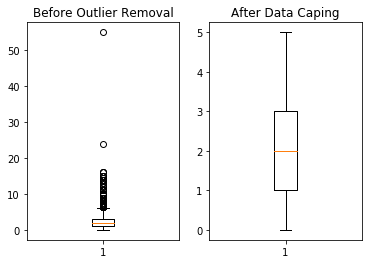

0    0.0
dtype: float64


In [3548]:
# Numerical Columns
#"Page Views Per Visit"

fig,a =  plt.subplots(1,2)
a[0].boxplot(lead_train["Page Views Per Visit"])
a[0].set_title('Before Outlier Removal')

# Drop the data points greater than 20
lead_train = lead_train[lead_train["Page Views Per Visit"]<=20]


# Lets Cap the remaining data points at Wiskers
cap_limit = outlier_boundary(lead_train["Page Views Per Visit"])
lead_train["Page Views Per Visit"] = lead_train["Page Views Per Visit"].apply(lambda x: cap_limit if x>cap_limit else x)

a[1].boxplot(lead_train["Page Views Per Visit"])
a[1].set_title('After Data Caping')
plt.show()
print(lead_train["Page Views Per Visit"].mode())

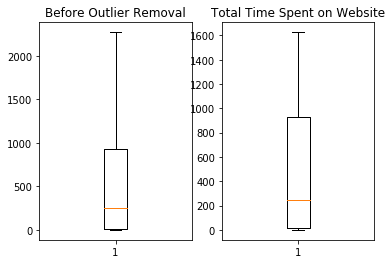

In [3549]:
#Total Time Spent on Website
fig,a =  plt.subplots(1,2)
a[0].boxplot(lead_train["Total Time Spent on Website"])
a[0].set_title('Before Outlier Removal')


# Lets Cap the remaining data points at Wiskers
cap_limit = outlier_boundary(lead_train["Total Time Spent on Website"])
lead_train["Total Time Spent on Website"] = lead_train["Total Time Spent on Website"].apply(lambda x: cap_limit if x>cap_limit else x)

a[1].boxplot(lead_train["Total Time Spent on Website"])
a[1].set_title('Total Time Spent on Website')
plt.show()

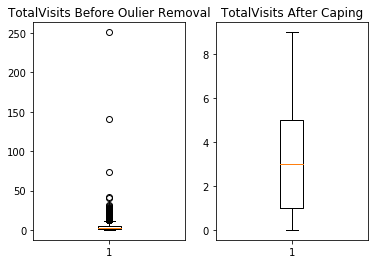

In [3550]:
#TotalVisits
fig,a =  plt.subplots(1,2)
a[0].boxplot(lead_train["TotalVisits"])
a[0].set_title('TotalVisits Before Oulier Removal')

# Remove data points above 100
lead_train = lead_train[lead_train["TotalVisits"]<=100]

# Lets Cap the remaining data points at Wiskers
cap_limit = outlier_boundary(lead_train["TotalVisits"])
lead_train["TotalVisits"] = lead_train["TotalVisits"].apply(lambda x: cap_limit if x>cap_limit else x)

a[1].boxplot(lead_train["TotalVisits"])
a[1].set_title('TotalVisits After Caping')
plt.show()

In [3551]:
# Inspecting shape of df
lead_train.shape

(6464, 13)

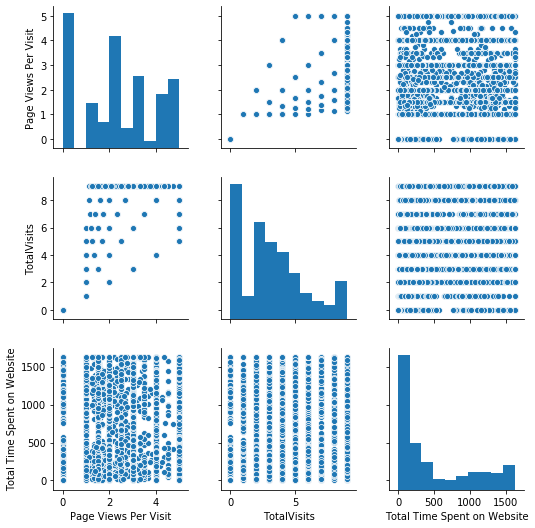

In [3552]:
# Bivariate Analysis
#Numerical Columns
num_col = ['Page Views Per Visit','TotalVisits','Total Time Spent on Website']
num_df = lead_train[num_col]
sns.pairplot(num_df)

,Page Views Per Visit,TotalVisits,Total Time Spent on Website
Page Views Per Visit,1.000000,0.778027,0.361600
TotalVisits,0.778027,1.000000,0.350066
Total Time Spent on Website,0.361600,0.350066,1.000000


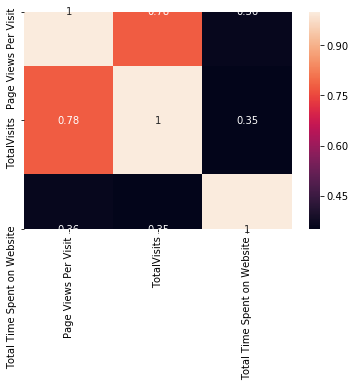

In [3553]:
sns.heatmap(num_df.corr(),annot = True)
num_df.corr()
# Page Views per visit and total visits are highly correlated.. Might cause Multi Colinearity issues.. Will resolve during VIQ Calculations

In [3554]:
# Weight of Evidence

def woe_cal(df,feature,target):
    df_woe_iv = (pd.crosstab(df[feature],df[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: dfx['woe']*
                                           (dfx[1]-dfx[0])))
    return df_woe_iv


'''
<0.02              useless for prediction
0.02 to 0.1        week predictor
0.1 to 0.3         medium predictor 
0.3 - 0.5          strong predictor
>0.5               suspisious or too good to be true
'''

'\n<0.02              useless for prediction\n0.02 to 0.1        week predictor\n0.1 to 0.3         medium predictor \n0.3 - 0.5          strong predictor\n>0.5               suspisious or too good to be true\n'

In [3555]:
# Lead Origin
res_df = woe_cal(lead_train,'Lead Origin','Converted')
print(res_df)
res_df[np.isfinite(res_df['iv'])]['iv'].sum()

Converted                        0         1       woe        iv
Lead Origin                                                     
API                       0.437720  0.316277 -0.324960  0.039464
Landing Page Submission   0.545706  0.504029 -0.079446  0.003311
Lead Import and Add Form  0.016575  0.179694  2.383384  0.388776


0.4315506582243546

In [3556]:
# Lead Source
res_df = woe_cal(lead_train,'Lead Source','Converted')
print(res_df)
res_df[np.isfinite(res_df['iv'])]['iv'].sum()

Converted              0         1       woe        iv
Lead Source                                           
Direct Traffic  0.304370  0.234488 -0.260837  0.018228
Google          0.302863  0.329170  0.083294  0.002191
Olark Chat      0.235560  0.126108 -0.624827  0.068389
Organic Search  0.122300  0.121273 -0.008434  0.000009
Other           0.011050  0.014504  0.272049  0.000940
Reference       0.007534  0.134972  2.885653  0.367742
Websites        0.016323  0.039484  0.883300  0.020458


0.4779554749129435

In [3557]:
# Last Activity
res_df = woe_cal(lead_train,'Last Activity','Converted')
print(res_df)
res_df[np.isfinite(res_df['iv'])]['iv'].sum()

Converted             0         1       woe        iv
Last Activity                                        
High_Intent    0.418634  0.542305  0.258831  0.032010
Low_Intent     0.460070  0.370669 -0.216070  0.019317
Middle_Intent  0.121296  0.087027 -0.332019  0.011378


0.06270488312857614

In [3558]:
# Country
res_df = woe_cal(lead_train,'Country','Converted')
print(res_df)
res_df[np.isfinite(res_df['iv'])]['iv'].sum()

Converted         0         1       woe        iv
Country                                          
India      0.716223  0.682514 -0.048208  0.001625
Others     0.035660  0.023771 -0.405570  0.004822
Unknown    0.248117  0.293715  0.168711  0.007693


0.014139905601356301

In [3559]:
#Specialization
res_df = woe_cal(lead_train,'Specialization','Converted')
print(res_df)
res_df[np.isfinite(res_df['iv'])]['iv'].sum()

Converted                                 0         1       woe        iv
Specialization                                                           
Banking, Investment And Insurance  0.031391  0.051168  0.488593  0.009663
Business                           0.073581  0.081386  0.100815  0.000787
E-COMMERCE                         0.011552  0.011684  0.011374  0.000002
Management                         0.409091  0.545528  0.287816  0.039269
Media and Advertising              0.021597  0.023771  0.095910  0.000209
Other                              0.424159  0.261483 -0.483740  0.078693
Services Excellence                0.005274  0.003223 -0.492361  0.001010
Travel and Tourism                 0.023355  0.021757 -0.070896  0.000113


0.12974437475916265

In [3560]:
#What is your current occupation
res_df = woe_cal(lead_train,'What is your current occupation','Converted')
print(res_df)
res_df[np.isfinite(res_df['iv'])]['iv'].sum()

Converted                               0         1       woe        iv
What is your current occupation                                        
Other                            0.406077  0.112812 -1.280819  0.375619
Student                          0.021346  0.021757  0.019052  0.000008
Unemployed                       0.561527  0.686543  0.201009  0.025129
Working Professional             0.011050  0.178888  2.784354  0.467321


0.8680779289252656

In [3561]:
#Last Notable Activity
res_df = woe_cal(lead_train,'Last Notable Activity','Converted')
print(res_df)
res_df[np.isfinite(res_df['iv'])]['iv'].sum()

Converted                     0         1       woe        iv
Last Notable Activity                                        
Email Opened           0.321195  0.291297 -0.097705  0.002921
Modified               0.458312  0.221595 -0.726697  0.172022
Other                  0.106228  0.066882 -0.462665  0.018204
SMS Sent               0.114264  0.420226  1.302279  0.398447


0.5915940249663961

In [3562]:
# WOE and IV Results
# Removing columns with IV < 0.02 or IV > 0.5 except for last notable activity
lead_train = lead_train.drop(['Country','What is your current occupation'],axis = 1)
drop_list.extend(['Country','What is your current occupation'])

In [3563]:
# Inspect Shape
print(lead_train.shape)
print(lead_train.columns)

(6464, 11)
Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'A free copy of Mastering The Interview',
       'Last Notable Activity', 'Converted'],
      dtype='object')


In [3564]:
# Variable Transformation and Scaling
# Creating 0 and 1 values for yes and no variables(In case of Do Not Email, It will be reverse)
# In case of Yes to "Do to Email", he is a bad lead, hence marked as 0
binary_list = ['A free copy of Mastering The Interview']
binary_list_not_email = ['Do Not Email']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

def binary_map_not_email(x):
    return x.map({'Yes': 0, "No": 1})
lead_train[binary_list] = leads_data[binary_list].apply(binary_map)
lead_train[binary_list_not_email] = leads_data[binary_list_not_email].apply(binary_map_not_email)

lead_train.head()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity,Converted
4715,API,Olark Chat,1,0.0,0.0,0.00,Low_Intent,Other,0,Email Opened,0
7132,API,Organic Search,1,2.0,1248.0,1.00,Low_Intent,Other,0,Email Opened,1
8954,Landing Page Submission,Direct Traffic,1,4.0,387.0,1.33,High_Intent,Business,1,SMS Sent,0
5283,Landing Page Submission,Direct Traffic,0,9.0,1209.0,5.00,Middle_Intent,Other,0,Other,0
3003,Landing Page Submission,Direct Traffic,1,3.0,1354.0,3.00,High_Intent,Management,1,Modified,0


In [3565]:
# Converting into dummy variables for categorical varibales with more than 2 unique values
dummy_list = ['Lead Origin','Lead Source','Last Activity','Specialization','Last Notable Activity']

dummy_var = pd.get_dummies(lead_train[dummy_list], drop_first = True)

# Adding to dataframe
lead_train = pd.concat([lead_train, dummy_var], axis=1)
lead_train.drop(dummy_list, axis = 1, inplace =  True)


In [3566]:
# Inspect the final dataframe
print(lead_train.shape)

(6464, 26)


In [3567]:
# Standardise Numerical Variables
print(num_df.columns)
scaler = MinMaxScaler()
lead_train[num_df.columns] = scaler.fit_transform(lead_train[num_df.columns])
lead_train[num_df.columns].head()

Index(['Page Views Per Visit', 'TotalVisits', 'Total Time Spent on Website'], dtype='object')


,Page Views Per Visit,TotalVisits,Total Time Spent on Website
4715,0.000,0.000000,0.000000
7132,0.200,0.222222,0.767764
8954,0.266,0.444444,0.238081
5283,1.000,1.000000,0.743771
3003,0.600,0.333333,0.832974


In [3568]:
# Feature Selection Using RFE(Top 15)
Y_Train = lead_train[['Converted']]
X_Train = lead_train.drop('Converted',axis = 1)

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_Train, Y_Train)

In [3569]:
# Print RFE Results
list(zip(X_Train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Import and Add Form', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Other', True, 1),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Websites', True, 1),
 ('Last Activity_Low_Intent', True, 1),
 ('Last Activity_Middle_Intent', False, 4),
 ('Specialization_Business', True, 1),
 ('Specialization_E-COMMERCE', False, 5),
 ('Specialization_Management', False, 2),
 ('Specialization_Media and Advertising', True, 1),
 ('Specialization_Other', True, 1),
 ('Specialization_Services Excellence', True, 1),
 ('Specialization_Travel and Tourism', False, 3),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Other', True, 1),
 ('L

In [3570]:
# Print the top features selected by RFE
col = X_Train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import and Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other', 'Lead Source_Websites', 'Last Activity_Low_Intent',
       'Specialization_Business', 'Specialization_Media and Advertising',
       'Specialization_Other', 'Specialization_Services Excellence',
       'Last Notable Activity_Modified', 'Last Notable Activity_Other',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [3571]:
# Model 1 
X_Train_sm = sm.add_constant(X_Train[col])
log_model = sm.GLM(Y_Train,X_Train_sm, family = sm.families.Binomial())
res = log_model.fit()
print(res.summary())


# Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_Train_sm[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)
# High VIF Variables
#['Page Views Per Visit','TotalVisits','Lead Origin_Landing Page Submission']

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6464
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2850.1
Date:                Mon, 07 Sep 2020   Deviance:                       5700.1
Time:                        13:57:59   Pearson chi2:                 6.55e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [3572]:
# Removing High VIF Variable - Page Views Per Visit

# Model 2
X_Train_sm = X_Train[col]
X_Train_sm = X_Train_sm.drop('Page Views Per Visit',axis = 1)
col = X_Train_sm.columns
X_Train_sm = sm.add_constant(X_Train_sm)
log_model = sm.GLM(Y_Train,X_Train_sm, family = sm.families.Binomial())
res = log_model.fit()
print(res.summary())

# Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_Train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6464
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2867.0
Date:                Mon, 07 Sep 2020   Deviance:                       5733.9
Time:                        13:57:59   Pearson chi2:                 6.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

,Features,VIF
0,const,65.93
19,Last Notable Activity_SMS Sent,3.85
5,Lead Origin_Landing Page Submission,3.60
17,Last Notable Activity_Modified,3.25
12,Last Activity_Low_Intent,3.20
8,Lead Source_Olark Chat,3.08
15,Specialization_Other,2.87
7,Lead Source_Google,2.31
6,Lead Origin_Lead Import and Add Form,2.28
4,A free copy of Mastering The Interview,2.13


In [3573]:
# Removing High P Value Variable - Specialization_Services Excellence

# Model 3
X_Train_sm = X_Train[col]
X_Train_sm = X_Train_sm.drop('Specialization_Services Excellence',axis = 1)
col = X_Train_sm.columns
X_Train_sm = sm.add_constant(X_Train_sm)
log_model = sm.GLM(Y_Train,X_Train_sm, family = sm.families.Binomial())
res = log_model.fit()
print(res.summary())

# Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_Train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6464
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2867.0
Date:                Mon, 07 Sep 2020   Deviance:                       5734.1
Time:                        13:57:59   Pearson chi2:                 6.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

,Features,VIF
0,const,65.86
18,Last Notable Activity_SMS Sent,3.85
5,Lead Origin_Landing Page Submission,3.60
16,Last Notable Activity_Modified,3.25
12,Last Activity_Low_Intent,3.20
8,Lead Source_Olark Chat,3.08
15,Specialization_Other,2.87
7,Lead Source_Google,2.31
6,Lead Origin_Lead Import and Add Form,2.28
4,A free copy of Mastering The Interview,2.13


In [3574]:
# Removing High P Value Variable - Specialization_Business 

# Model 3
X_Train_sm = X_Train[col]
X_Train_sm = X_Train_sm.drop('Specialization_Business',axis = 1)
col = X_Train_sm.columns
X_Train_sm = sm.add_constant(X_Train_sm)
log_model = sm.GLM(Y_Train,X_Train_sm, family = sm.families.Binomial())
res = log_model.fit()
print(res.summary())

# Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_Train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6464
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2867.2
Date:                Mon, 07 Sep 2020   Deviance:                       5734.4
Time:                        13:57:59   Pearson chi2:                 6.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

,Features,VIF
0,const,65.64
17,Last Notable Activity_SMS Sent,3.85
5,Lead Origin_Landing Page Submission,3.60
15,Last Notable Activity_Modified,3.25
12,Last Activity_Low_Intent,3.20
8,Lead Source_Olark Chat,3.08
14,Specialization_Other,2.83
7,Lead Source_Google,2.31
6,Lead Origin_Lead Import and Add Form,2.28
4,A free copy of Mastering The Interview,2.13


In [3575]:
# Removing High P Value Variable - Specialization_Media and Advertising

# Model 4
X_Train_sm = X_Train[col]
X_Train_sm = X_Train_sm.drop('Specialization_Media and Advertising',axis = 1)
col = X_Train_sm.columns
X_Train_sm = sm.add_constant(X_Train_sm)
log_model = sm.GLM(Y_Train,X_Train_sm, family = sm.families.Binomial())
res = log_model.fit()
print(res.summary())

# Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_Train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6464
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2867.5
Date:                Mon, 07 Sep 2020   Deviance:                       5734.9
Time:                        13:57:59   Pearson chi2:                 6.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

,Features,VIF
0,const,65.64
16,Last Notable Activity_SMS Sent,3.85
5,Lead Origin_Landing Page Submission,3.60
14,Last Notable Activity_Modified,3.25
12,Last Activity_Low_Intent,3.20
8,Lead Source_Olark Chat,3.08
13,Specialization_Other,2.82
7,Lead Source_Google,2.31
6,Lead Origin_Lead Import and Add Form,2.28
4,A free copy of Mastering The Interview,2.13


In [3576]:
# Removing High P Value Variable - Lead Source_Organic Search

# Model 5
X_Train_sm = X_Train[col]
X_Train_sm = X_Train_sm.drop('Lead Source_Organic Search',axis = 1)
col = X_Train_sm.columns
X_Train_sm = sm.add_constant(X_Train_sm)
log_model = sm.GLM(Y_Train,X_Train_sm, family = sm.families.Binomial())
res = log_model.fit()
print(res.summary())

# Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_Train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6464
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2867.9
Date:                Mon, 07 Sep 2020   Deviance:                       5735.9
Time:                        13:58:00   Pearson chi2:                 6.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

,Features,VIF
0,const,63.59
15,Last Notable Activity_SMS Sent,3.85
5,Lead Origin_Landing Page Submission,3.49
13,Last Notable Activity_Modified,3.25
11,Last Activity_Low_Intent,3.20
12,Specialization_Other,2.82
8,Lead Source_Olark Chat,2.76
6,Lead Origin_Lead Import and Add Form,2.18
14,Last Notable Activity_Other,2.12
4,A free copy of Mastering The Interview,2.09


In [3577]:

# Removing High P Value Variable - Last Notable Activity_Modified

# Model 5
X_Train_sm = X_Train[col]
X_Train_sm = X_Train_sm.drop('Last Notable Activity_Modified',axis = 1)
col = X_Train_sm.columns
X_Train_sm = sm.add_constant(X_Train_sm)
log_model = sm.GLM(Y_Train,X_Train_sm, family = sm.families.Binomial())
res = log_model.fit()
print(res.summary())

# Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_Train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6464
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2868.8
Date:                Mon, 07 Sep 2020   Deviance:                       5737.6
Time:                        13:58:00   Pearson chi2:                 6.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

,Features,VIF
0,const,37.65
5,Lead Origin_Landing Page Submission,3.49
12,Specialization_Other,2.82
8,Lead Source_Olark Chat,2.76
6,Lead Origin_Lead Import and Add Form,2.18
4,A free copy of Mastering The Interview,2.09
2,TotalVisits,1.85
7,Lead Source_Google,1.82
14,Last Notable Activity_SMS Sent,1.47
11,Last Activity_Low_Intent,1.45


In [3578]:

# Removing High P Value Variable - Lead Source_Google

# Model 5
X_Train_sm = X_Train[col]
X_Train_sm = X_Train_sm.drop('Lead Source_Google',axis = 1)
col = X_Train_sm.columns
X_Train_sm = sm.add_constant(X_Train_sm)
log_model = sm.GLM(Y_Train,X_Train_sm, family = sm.families.Binomial())
res = log_model.fit()
print(res.summary())

# Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_Train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6464
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2869.7
Date:                Mon, 07 Sep 2020   Deviance:                       5739.5
Time:                        13:58:00   Pearson chi2:                 6.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

,Features,VIF
0,const,34.56
5,Lead Origin_Landing Page Submission,3.47
11,Specialization_Other,2.80
7,Lead Source_Olark Chat,2.23
6,Lead Origin_Lead Import and Add Form,1.94
2,TotalVisits,1.85
4,A free copy of Mastering The Interview,1.53
13,Last Notable Activity_SMS Sent,1.47
10,Last Activity_Low_Intent,1.45
3,Total Time Spent on Website,1.28


In [3579]:
# Inspect Shape and columns
print(X_Train_sm.shape)
print(X_Train_sm.columns)

Y_Train.shape

(6464, 14)
Index(['const', 'Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import and Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Other', 'Lead Source_Websites', 'Last Activity_Low_Intent',
       'Specialization_Other', 'Last Notable Activity_Other',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


(6464, 1)

In [3580]:
# Making Predictions on Y Variables
Y_Train_pred = pd.DataFrame(res.predict(X_Train_sm)).reset_index(drop = True)
Y_Train_pred.columns = ['Predicted']
# Lets set cutoff to be 0.5 now
cutoff  = 0.5
Y_Train = Y_Train.reset_index(drop = True)
Y_Train['Predicted'] = Y_Train_pred['Predicted']


Y_Train['Predicted_Label'] = Y_Train['Predicted'].apply(lambda x : 1 if x>=cutoff else 0)
print(Y_Train.shape)

(6464, 3)


In [3581]:
# Confusion matrix 
confusion_matrix = metrics.confusion_matrix(Y_Train.Converted, Y_Train.Predicted_Label )
print(confusion_matrix)
print(Y_Train.shape)

# Checking other metrics
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

# Checking Accuracy
# Checking the overall accuracy.
print("Accuracy: ",metrics.accuracy_score(Y_Train.Converted, Y_Train.Predicted_Label))
# Checking the sensitivity of the model
print("Sensitivity: ",TP / float(TP+FN))
# Calculating specificity
print("Specificity: ",TN / float(TN+FP))
# Calculating false postive rate - predicting converted rate when lead actually did not get converted
print("False Positive Rate: ",FP/ float(TN+FP))
# Calculating positive predictive value 
print ("Positive Predictive Value: ",TP / float(TP+FP))
# Calculating negative predictive value
print ("Negative Predictive Value: ",TN / float(TN+ FN))

[[3443  539]
 [ 762 1720]]
(6464, 3)
Accuracy:  0.7987314356435643
Sensitivity:  0.6929895245769541
Specificity:  0.8646408839779005
False Positive Rate:  0.13535911602209943
Positive Predictive Value:  0.7613988490482514
Negative Predictive Value:  0.8187871581450654


In [3582]:
# Draw ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    print(Y_Train.shape)

    return None

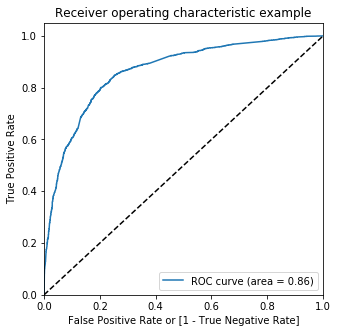

(6464, 3)


In [3583]:
fpr, tpr, thresholds = metrics.roc_curve( Y_Train.Converted, Y_Train.Predicted,drop_intermediate = False )
draw_roc(Y_Train.Converted, Y_Train.Predicted)

In [3584]:
# Creating columns with different probability cutoffs 
Y_Train_v2 = Y_Train.copy()
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_Train_v2[i]= Y_Train_v2.Predicted.map(lambda x: 1 if x > i else 0)

In [3585]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_Train_v2.Converted, Y_Train_v2[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383973  1.000000  0.000000
0.1   0.1  0.575031  0.966559  0.330989
0.2   0.2  0.751083  0.881144  0.670015
0.3   0.3  0.786200  0.839645  0.752888
0.4   0.4  0.799350  0.774778  0.814666
0.5   0.5  0.798731  0.692990  0.864641
0.6   0.6  0.786046  0.570911  0.920141
0.7   0.7  0.766089  0.477035  0.946258
0.8   0.8  0.739480  0.372683  0.968106
0.9   0.9  0.691522  0.219581  0.985686


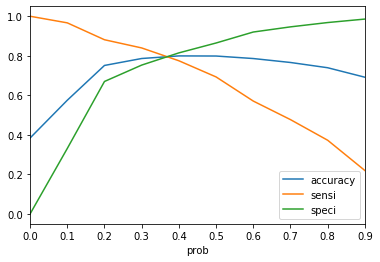

In [3586]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# Lets Keep the cutoff to be 0.35 and repeat the same analysis

In [3587]:
# Making Predictions on Y Variables
Y_Train_pred = pd.DataFrame(res.predict(X_Train_sm)).reset_index(drop = True)
Y_Train_pred.columns = ['Predicted']
# Lets set cutoff to be 0.30 now
cutoff  = 0.30
Y_Train = Y_Train.reset_index(drop = True)
Y_Train['Predicted'] = Y_Train_pred['Predicted']


Y_Train['Predicted_Label'] = Y_Train['Predicted'].apply(lambda x : 1 if x>=cutoff else 0)

In [3588]:
# Confusion matrix 
confusion_matrix = metrics.confusion_matrix(Y_Train.Converted, Y_Train.Predicted_Label )
print(confusion_matrix)

[[2998  984]
 [ 398 2084]]


In [3589]:
# Checking other metrics
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

# Checking Accuracy
# Checking the overall accuracy.
print("Accuracy: ",metrics.accuracy_score(Y_Train.Converted, Y_Train.Predicted_Label))
# Checking the sensitivity of the model
print("Sensitivity: ",TP / float(TP+FN))
# Calculating specificity
print("Specificity: ",TN / float(TN+FP))
# Calculating false postive rate - predicting converted rate when lead actually did not get converted
print("False Positive Rate: ",FP/ float(TN+FP))
# Calculating positive predictive value 
print ("Positive Predictive Value: ",TP / float(TP+FP))
# Calculating negative predictive value
print ("Negative Predictive Value: ",TN / float(TN+ FN))

Accuracy:  0.786200495049505
Sensitivity:  0.8396454472199839
Specificity:  0.7528879959819186
False Positive Rate:  0.24711200401808137
Positive Predictive Value:  0.6792698826597132
Negative Predictive Value:  0.8828032979976443


In [3590]:
# Testing Starts
lead_test = pd.concat([X_Test,Y_Test],axis = 1)

# Final Columns for selection 
col_names = ['Do Not Email','TotalVisits','Total Time Spent on Website','A free copy of Mastering The Interview','Lead Origin','Lead Source','Last Activity','Specialization',
            'Last Notable Activity','Converted']
lead_test = lead_test[col_names]

In [3591]:
print(lead_test.isnull().sum()/len(lead_test)*100)
for col in lead_test.columns:
    if((lead_test[col]=='Select').any(axis = 0)):
        select_val_list.append(col)
print(select_val_list)


Do Not Email                               0.000000
TotalVisits                                1.587302
Total Time Spent on Website                0.000000
A free copy of Mastering The Interview     0.000000
Lead Origin                                0.000000
Lead Source                                0.288600
Last Activity                              1.298701
Specialization                            15.584416
Last Notable Activity                      0.000000
Converted                                  0.000000
dtype: float64
['Specialization']


In [3592]:
# Imputing Null values directly from the values of train dataset
# Lead Source

lead_test['Lead Source'].value_counts()
#Lets Impute the missing values by 'Others'
lead_test['Lead Source'] = lead_test['Lead Source'].fillna('Other')
lead_test['Lead Source'] =  lead_test['Lead Source'].apply(lambda x :replace_leadsource(x))
print(lead_test['Lead Source'].value_counts())


Google            850
Direct Traffic    746
Olark Chat        504
Organic Search    365
Reference         169
Websites          104
Other              34
Name: Lead Source, dtype: int64


In [3593]:
# Specialization

lead_test['Specialization'].value_counts()
#Lets Impute the missing values by 'Others'
lead_test['Specialization'] = lead_test['Specialization'].fillna('Other')
lead_test['Specialization'] = lead_test['Specialization'].replace('Select','Other')
lead_test['Specialization'] = lead_test['Specialization'].apply(lambda x :replace_specialisation(x))
print(lead_test['Specialization'].value_counts())

Management                           1267
Other                                1041
Business                              216
Banking, Investment And Insurance      86
Media and Advertising                  58
Travel and Tourism                     56
E-COMMERCE                             37
Services Excellence                    11
Name: Specialization, dtype: int64


In [3594]:
# Last Activity

lead_test['Last Activity'].value_counts()
#Lets Impute the missing values by 'Others'
lead_test['Last Activity'] = lead_test['Last Activity'].fillna('Middle_Intent')
lead_test['Last Activity'] = lead_test['Last Activity'].apply(lambda x :replace_lastactivity(x))
print(lead_test['Last Activity'].value_counts())

High_Intent      1288
Low_Intent       1168
Middle_Intent     316
Name: Last Activity, dtype: int64


In [3595]:
#TotalVisits
lead_test['TotalVisits'] = lead_test['TotalVisits'].fillna(float(0))
cap_limit = outlier_boundary(lead_test["TotalVisits"])
lead_test["TotalVisits"] = lead_test["TotalVisits"].apply(lambda x: cap_limit if x>cap_limit else x)

In [3596]:
#Total Time Spent on Website
cap_limit = outlier_boundary(lead_test["Total Time Spent on Website"])
lead_test["Total Time Spent on Website"] = lead_test["Total Time Spent on Website"].apply(lambda x: cap_limit if x>cap_limit else x)


In [3597]:
#Lead Origin
lead_test['Lead Origin'] = lead_test['Lead Origin'].apply(lambda x : replace_leadform(x))
print(100*(lead_test['Lead Origin'].value_counts()/len(lead_test)))


Landing Page Submission     52.633478
API                         37.914863
Lead Import and Add Form     9.451659
Name: Lead Origin, dtype: float64


In [3598]:
#Last Notable Activity 
lead_test['Last Notable Activity'] = lead_test['Last Notable Activity'].apply(lambda x :replace_lastnotableactivity(x))
100*(lead_test['Last Notable Activity'].value_counts()/len(lead_test))

Modified        37.157287
Email Opened    29.761905
SMS Sent        24.314574
Other            8.766234
Name: Last Notable Activity, dtype: float64

In [3599]:
select_val_list =[]
print(lead_test.isnull().sum()/len(lead_test)*100)
for col in lead_test.columns:
    if((lead_test[col]=='Select').any(axis = 0)):
        select_val_list.append(col)
print(select_val_list)


Do Not Email                              0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
A free copy of Mastering The Interview    0.0
Lead Origin                               0.0
Lead Source                               0.0
Last Activity                             0.0
Specialization                            0.0
Last Notable Activity                     0.0
Converted                                 0.0
dtype: float64
[]


In [3600]:
# Variable Transformation and Scaling
# Creating 0 and 1 values for yes and no variables
binary_list = ['A free copy of Mastering The Interview']
binary_list_not_email = ['Do Not Email']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

def binary_map_not_email(x):
    return x.map({'Yes': 0, "No": 1})
lead_test[binary_list] = lead_test[binary_list].apply(binary_map)
lead_test[binary_list_not_email] = lead_test[binary_list_not_email].apply(binary_map_not_email)


In [3601]:
# Converting into dummy variables for categorical varibales with more than 2 unique values
dummy_list = ['Lead Origin','Lead Source','Last Activity','Specialization','Last Notable Activity']

dummy_var = pd.get_dummies(lead_test[dummy_list], drop_first = True)

# Adding to dataframe
lead_test = pd.concat([lead_test, dummy_var], axis=1)
lead_test.drop(dummy_list, axis = 1, inplace =  True)
print(lead_test.shape)
print(lead_test.columns)

(2772, 25)
Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview', 'Converted',
       'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import and Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other', 'Lead Source_Reference', 'Lead Source_Websites',
       'Last Activity_Low_Intent', 'Last Activity_Middle_Intent',
       'Specialization_Business', 'Specialization_E-COMMERCE',
       'Specialization_Management', 'Specialization_Media and Advertising',
       'Specialization_Other', 'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Last Notable Activity_Modified',
       'Last Notable Activity_Other', 'Last Notable Activity_SMS Sent'],
      dtype='object')


In [3602]:
# Standardise Numerical Variables
num_cols = ['TotalVisits','Total Time Spent on Website']
num_df = lead_train[num_cols]
scaler = MinMaxScaler()
lead_test[num_df.columns] = scaler.fit_transform(lead_test[num_df.columns])


In [3603]:
lead_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Converted,Lead Origin_Landing Page Submission,Lead Origin_Lead Import and Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Websites,Last Activity_Low_Intent,Last Activity_Middle_Intent,Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Other,Specialization_Services Excellence,Specialization_Travel and Tourism,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
4608,1,0.761905,0.152971,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
7935,0,0.190476,0.563927,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4043,0,0.095238,0.001214,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
7821,1,0.190476,0.196070,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
856,1,0.285714,0.122012,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [3604]:
# Preparing Final Column list for test set
final_col_list =  ['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import and Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Other', 'Lead Source_Websites', 'Last Activity_Low_Intent',
       'Specialization_Other', 'Last Notable Activity_Other',
       'Last Notable Activity_SMS Sent']
X_Test = lead_test[final_col_list]
Y_Test = lead_test['Converted']

In [3605]:
#Inspecting the test set
print(X_Test.shape)
Y_Test = pd.DataFrame(Y_Test)
print(Y_Test.shape)

(2772, 13)
(2772, 1)


In [3606]:
# Making Predictions on Y Variables
X_Test_sm = sm.add_constant(X_Test)
Y_Test_pred = pd.DataFrame(res.predict(X_Test_sm)).reset_index(drop = True)
Y_Test_pred.columns = ['Predicted']
# Lets set cutoff to be 0.30 now
cutoff  = 0.30
Y_Test2 = Y_Test.reset_index(drop = True)
Y_Test2['Predicted'] = Y_Test_pred['Predicted']


Y_Test2['Predicted_Label'] = Y_Test2['Predicted'].apply(lambda x : 1 if x>=cutoff else 0)


In [3607]:
# Confusion matrix 
confusion_matrix = metrics.confusion_matrix(Y_Test2.Converted, Y_Test2.Predicted_Label )
print(confusion_matrix)

# Checking other metrics
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

# Checking Accuracy
# Checking the overall accuracy.
print("Accuracy: ",metrics.accuracy_score(Y_Test2.Converted, Y_Test2.Predicted_Label))
# Checking the sensitivity of the model
print("Sensitivity: ",TP / float(TP+FN))
# Calculating specificity
print("Specificity: ",TN / float(TN+FP))
# Calculating false postive rate - predicting converted rate when lead actually did not get converted
print("False Positive Rate: ",FP/ float(TN+FP))
# Calculating positive predictive value 
print ("Positive Predictive Value: ",TP / float(TP+FP))
# Calculating negative predictive value
print ("Negative Predictive Value: ",TN / float(TN+ FN))

[[1285  410]
 [ 151  926]]
Accuracy:  0.7976190476190477
Sensitivity:  0.8597957288765088
Specificity:  0.7581120943952803
False Positive Rate:  0.24188790560471976
Positive Predictive Value:  0.6931137724550899
Negative Predictive Value:  0.8948467966573816


In [3608]:
# Finding the hot leads Cutoff and Score
Y_Test2['Predicted_Score'] = Y_Test2['Predicted']*100
# If the score is > 30, he/she is a hot lead, else not

In [3609]:
# Final Remarks

# The Training Model has the following variables 
'''
'Do Not Email', 'TotalVisits', 'Total Time Spent on Website','A free copy of Mastering The Interview','Lead Origin',
'Lead Source','Last Activity' , 'Specialization', 'Last Notable Activity'

# Most of the columns are either related to a site activity or the origin/ source from where they got the info
# Also depends on whether they want an interview mastery and their specialisation 
'''

# We have considered 13 variables in the final model after excluding variables causing multi colinearity and p values issues
# The optimal cutoff choosen after performing Sensitivity, Specificity and Accuracy Analysis is 0.3
# The Optimal score for hot leads is hence choosen as 30, Anyone above 30 is a hot lead
# The Train [accuracy, sensitivity and specificity] = [0.79,0.84,0.75]
# The Test [accuracy, sensitivity and specificity] = [0.80,0.86,0.76]


# The major metrics here was not just accuracy but also senstivity because we should not miss on any Actual postives(Actual leads)



"\n'Do Not Email', 'TotalVisits', 'Total Time Spent on Website','A free copy of Mastering The Interview','Lead Origin',\n'Lead Source','Last Activity' , 'Specialization', 'Last Notable Activity'\n\n# Most of the columns are either related to a site activity or the origin/ source from where they got the info\n# Also depends on whether they want an interview mastery and their specialisation \n"

In [ ]:
# 